In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
plt.style.use('ggplot')

# Collecting initial data

we are using __existing data__, provided by the contractor as part of the project.

we can find in the dataset 79 unique attributes.

# Describe data

In [2]:
data = pd.read_csv('train.csv', ',')
columns_20_to_40 = data.iloc[:, 39:60]
columns_20_to_40.head()


/home/eddy/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3508: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt
0,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,...,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0
1,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,...,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0
2,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,...,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0
3,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,...,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0
4,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,...,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0


## Amount of data

In [3]:
display(columns_20_to_40.size, columns_20_to_40.info)

30660

<bound method DataFrame.info of      Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0       GasA        Ex          Y      SBrkr       856       854   
1       GasA        Ex          Y      SBrkr      1262         0   
2       GasA        Ex          Y      SBrkr       920       866   
3       GasA        Gd          Y      SBrkr       961       756   
4       GasA        Ex          Y      SBrkr      1145      1053   
...      ...       ...        ...        ...       ...       ...   
1455    GasA        Ex          Y      SBrkr       953       694   
1456    GasA        TA          Y      SBrkr      2073         0   
1457    GasA        Ex          Y      SBrkr      1188      1152   
1458    GasA        Gd          Y      FuseA      1078         0   
1459    GasA        Gd          Y      SBrkr      1256         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  ...  HalfBath  \
0                0       1710             1             0  ...         1   

## Value types

In [4]:
columns_20_to_40.columns

Index(['Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt'],
      dtype='object')

In [5]:
columns_20_to_40.dtypes

Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
KitchenQual      object
TotRmsAbvGrd      int64
Functional       object
Fireplaces        int64
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
dtype: object

## Coding scheme

no enconding conflict found, because it's provided by the contractor and probably has been cleaned before hand.

**in the data description we have an explanation of all data meaning which is really nice**

In [6]:
for column in columns_20_to_40.columns:
    if (len(columns_20_to_40[column].unique()) <= 10):
        print(column, ' : ', columns_20_to_40[column].unique())
    else:
        print(column, ' : ', columns_20_to_40[column].dtypes)

Heating  :  ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
HeatingQC  :  ['Ex' 'Gd' 'TA' 'Fa' 'Po']
CentralAir  :  ['Y' 'N']
Electrical  :  ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
1stFlrSF  :  int64
2ndFlrSF  :  int64
LowQualFinSF  :  int64
GrLivArea  :  int64
BsmtFullBath  :  [1 0 2 3]
BsmtHalfBath  :  [0 1 2]
FullBath  :  [2 1 3 0]
HalfBath  :  [1 0 2]
BedroomAbvGr  :  [3 4 1 2 0 5 6 8]
KitchenAbvGr  :  [1 2 3 0]
KitchenQual  :  ['Gd' 'TA' 'Ex' 'Fa']
TotRmsAbvGrd  :  int64
Functional  :  ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
Fireplaces  :  [0 1 2 3]
FireplaceQu  :  [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageType  :  ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageYrBlt  :  float64


### Missing Values ?

TODO

- check NA values
- change object dtypes in categorical

In [7]:
for column in columns_20_to_40.columns:
    if not columns_20_to_40[column].isna().sum() == 0:
        print('column with missing values', column, ' : ', columns_20_to_40[column].isna().sum())

column with missing values Electrical  :  1
column with missing values FireplaceQu  :  690
column with missing values GarageType  :  81
column with missing values GarageYrBlt  :  81


In [8]:
data['PriceType'] = np.where(
                            data['SalePrice'] >= 300000,
                            'HIGH',
                            np.where(
                                data['SalePrice'] <= 150000,
                                'LOW',
                                'MEDIUM'
                                )
                            )

In [9]:

def data_show_categorical(attribute, title=None):
    # previous plots
    #plt.rcParams.update({'font.size': 5})
    #data['SalePrice'].hist(by=data[attribute])

    data[attribute].value_counts().plot(kind = 'bar')
    plt.show()
    data.groupby([attribute, 'PriceType']).size().unstack().plot(kind='bar', stacked=True, title=title)

def data_show_categorical_compare(attribute, attribute2, title=None):
    data.groupby([attribute, 'PriceType', attribute2]).size().unstack().plot(kind='bar', stacked=True, title=title)

Categorical arrangement

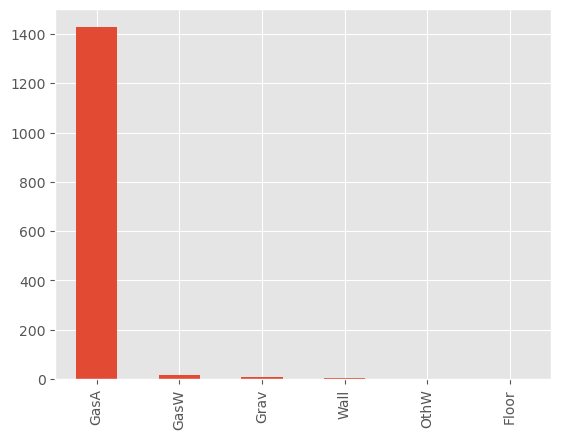

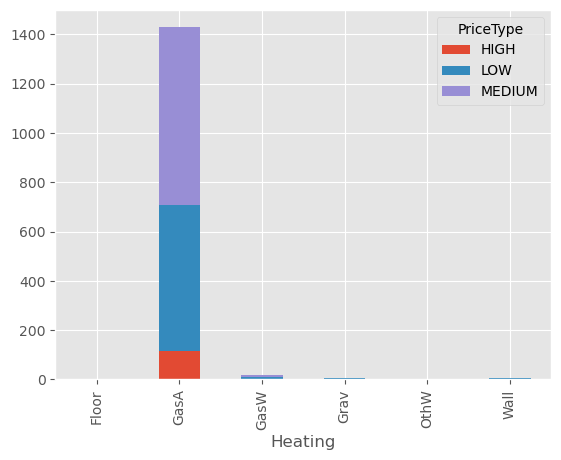

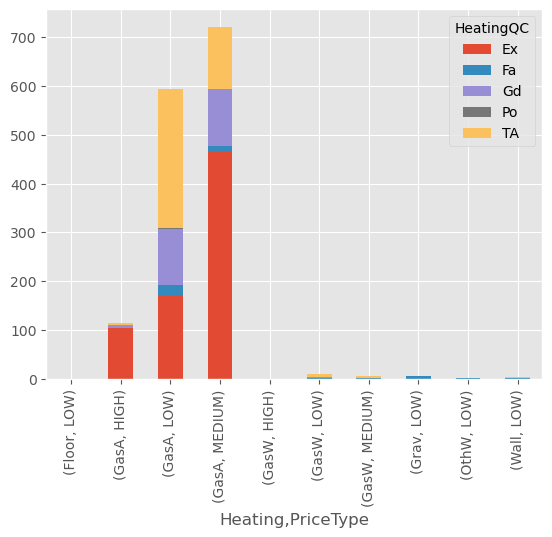

In [10]:
data_show_categorical('Heating')
data_show_categorical_compare('Heating', 'HeatingQC')

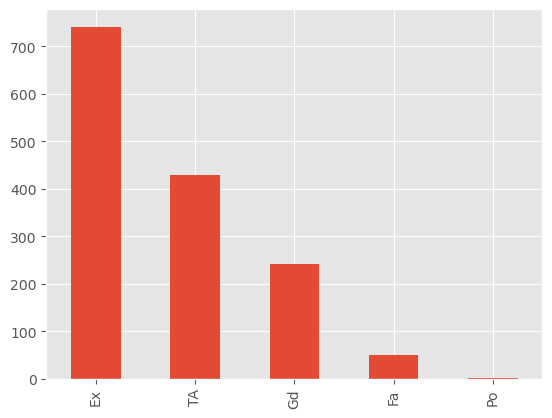

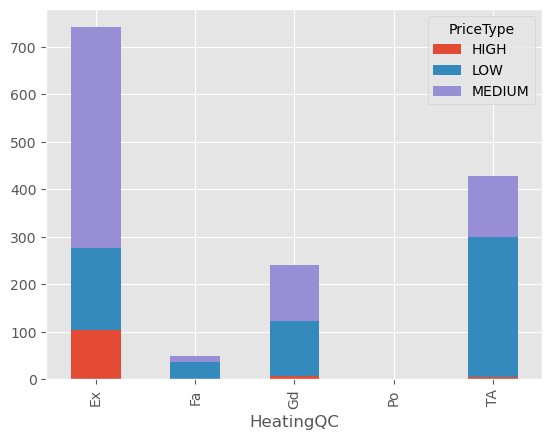

In [11]:
data_show_categorical('HeatingQC')

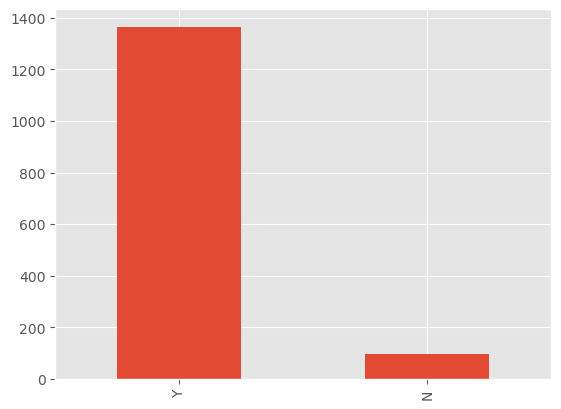

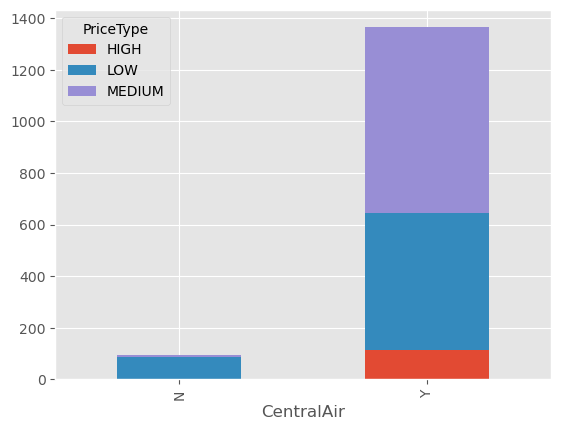

In [12]:
data_show_categorical('CentralAir')

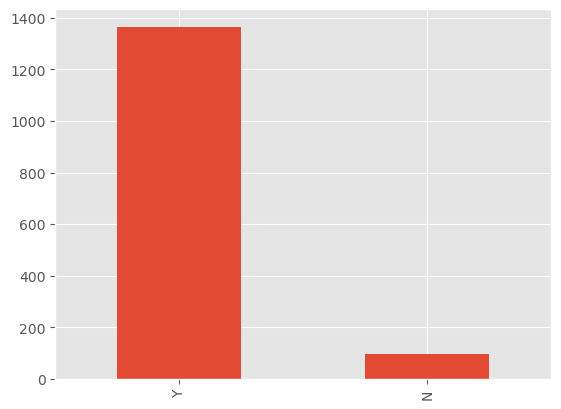

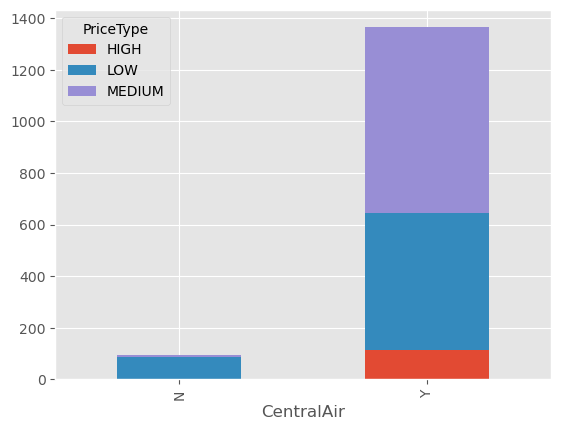

In [13]:
data_show_categorical('CentralAir')

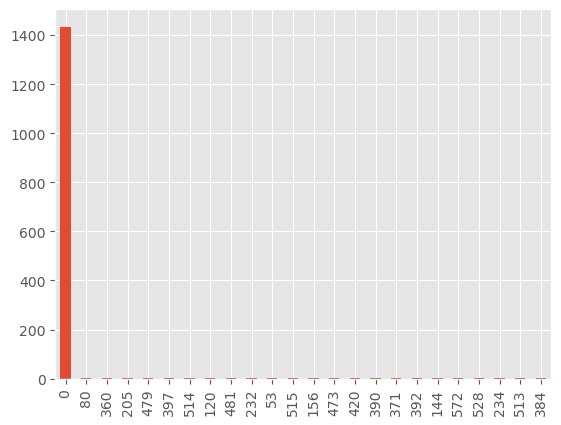

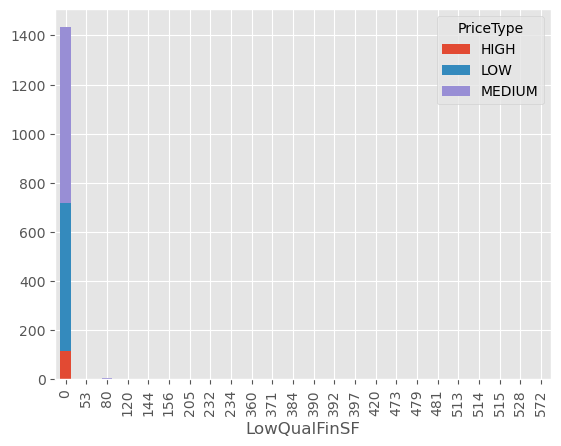

In [14]:
data_show_categorical('LowQualFinSF')

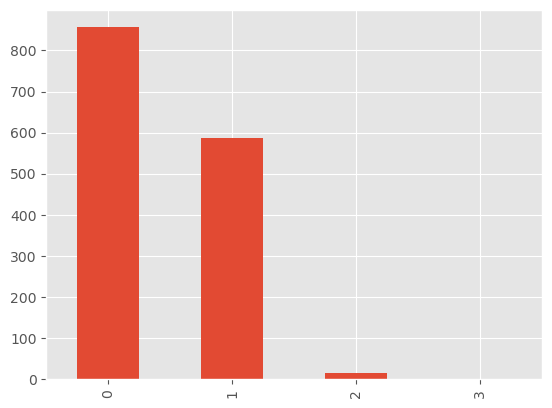

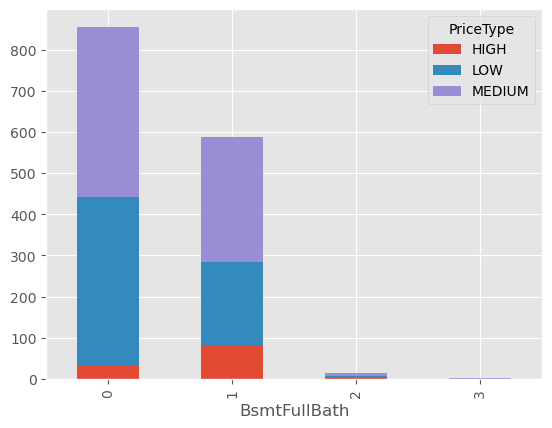

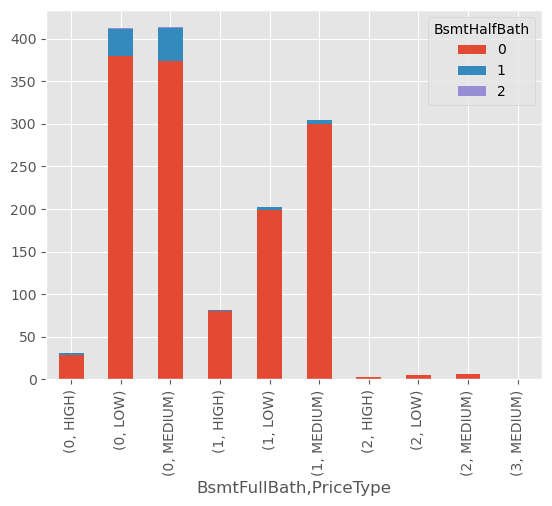

In [15]:
data_show_categorical('BsmtFullBath')
data_show_categorical_compare('BsmtFullBath', 'BsmtHalfBath')

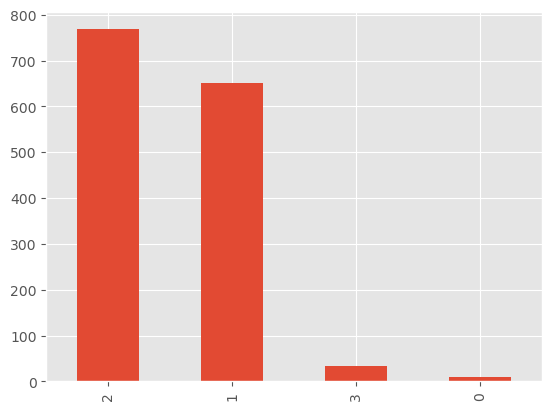

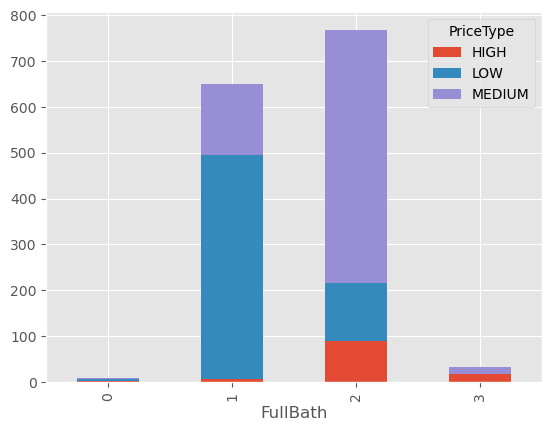

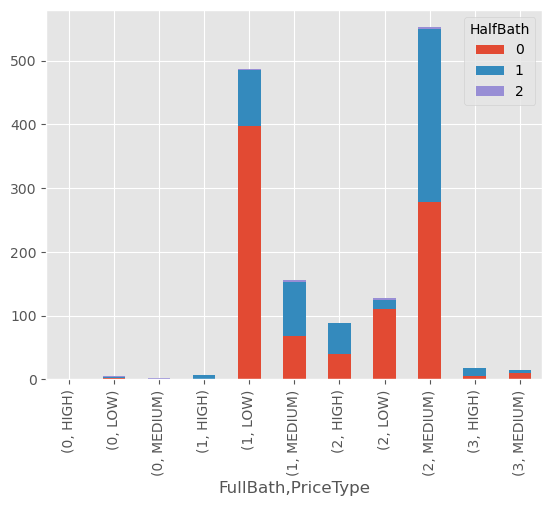

In [16]:
data_show_categorical('FullBath')
data_show_categorical_compare('FullBath', 'HalfBath')

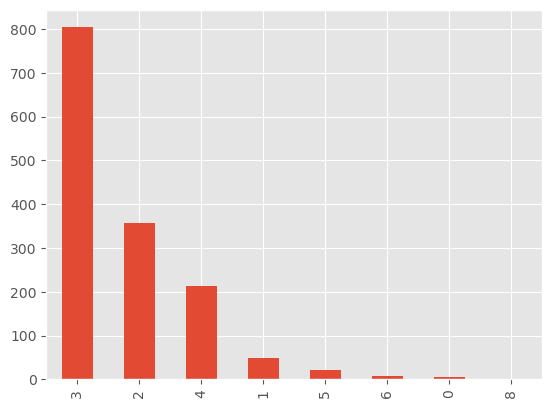

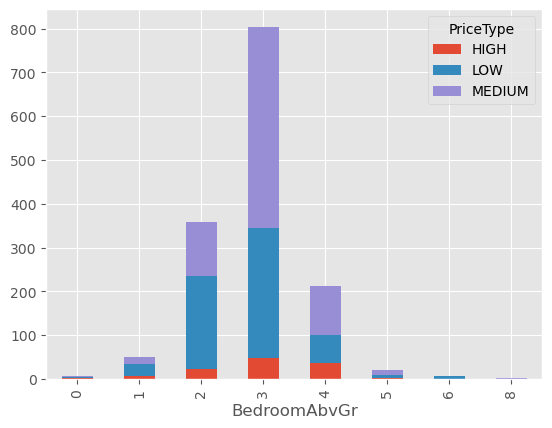

In [17]:
data_show_categorical('BedroomAbvGr')

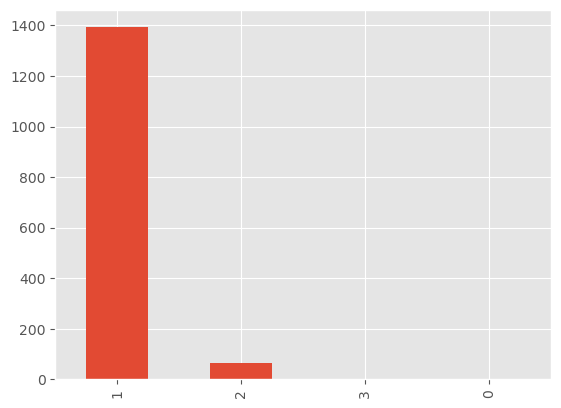

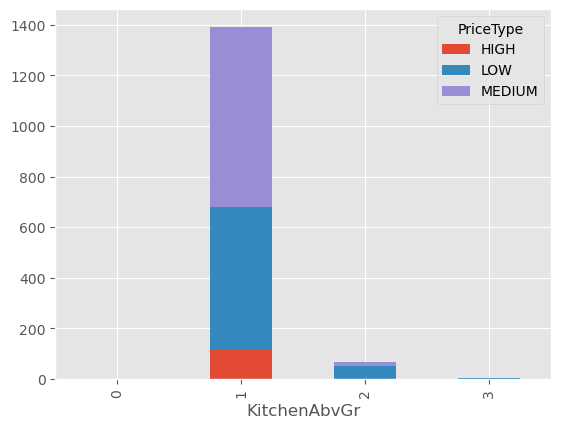

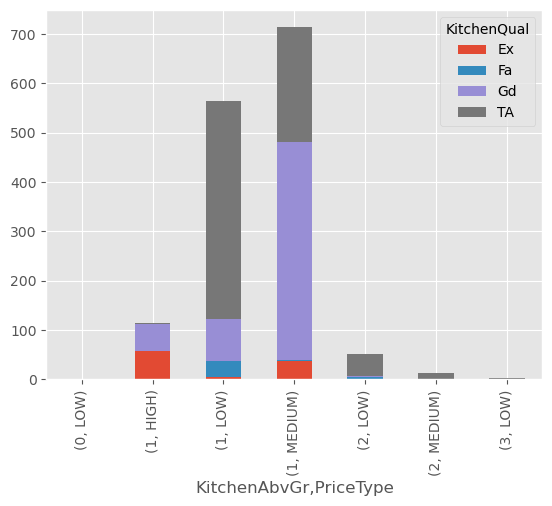

In [18]:
data_show_categorical('KitchenAbvGr')
data_show_categorical_compare('KitchenAbvGr', 'KitchenQual')

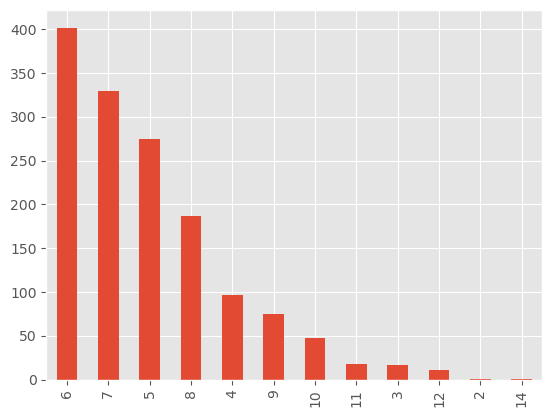

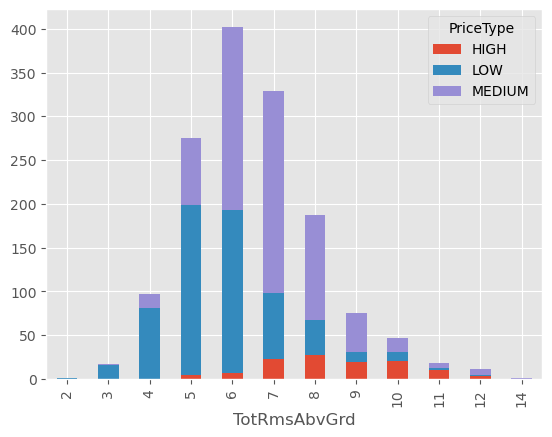

In [19]:
data_show_categorical('TotRmsAbvGrd')

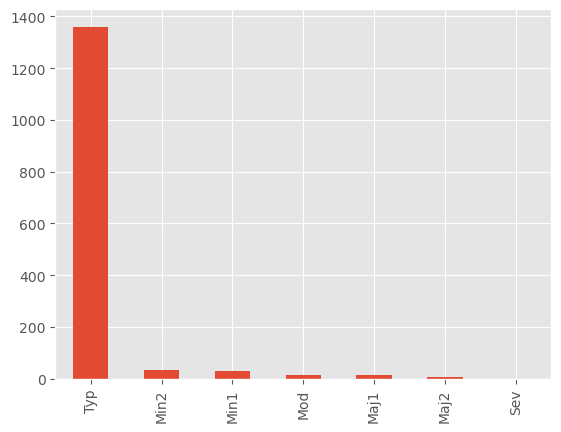

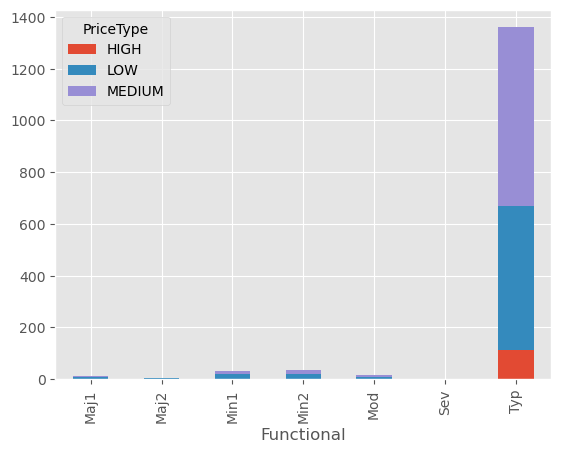

In [20]:
data_show_categorical('Functional')

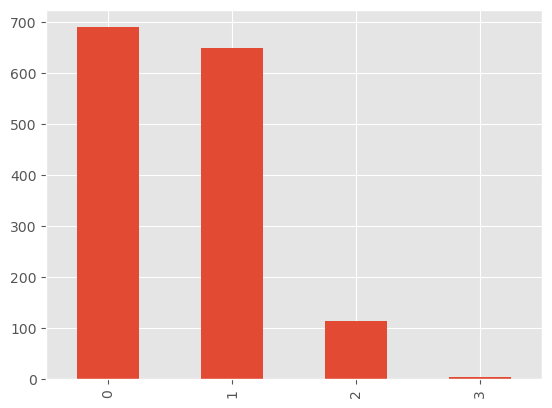

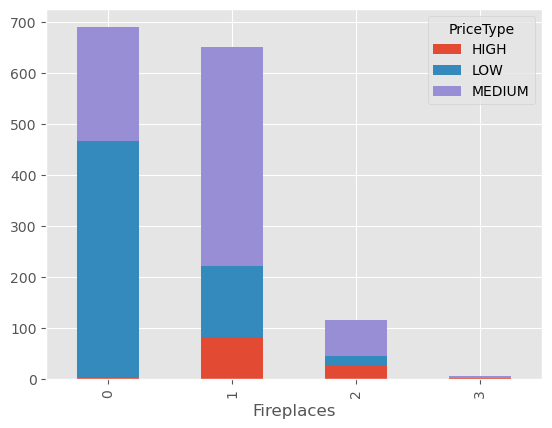

In [21]:
data_show_categorical('Fireplaces')

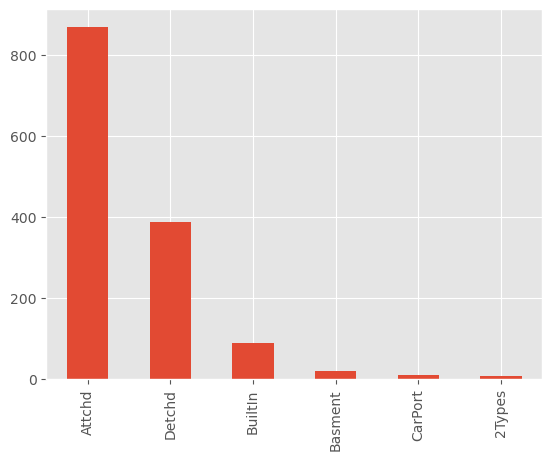

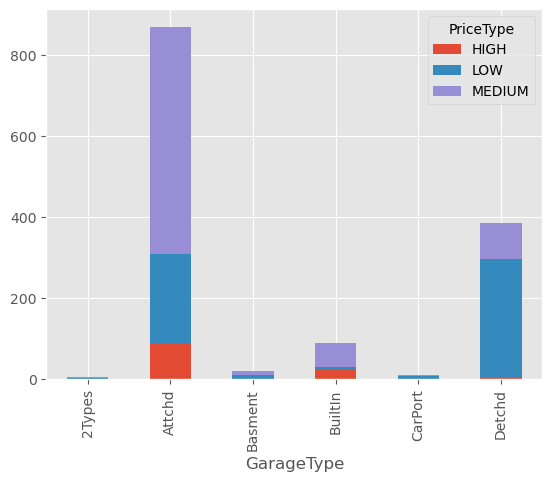

In [22]:
data_show_categorical('GarageType')

In [23]:
def data_show_numerical(attribute):
    # first plot
    data.plot(kind = 'scatter', x = attribute, y = 'SalePrice')
    plt.show()

    # second plot
    tmp_data = data.dropna(subset=[attribute])

    xy = np.vstack([tmp_data[attribute], tmp_data['SalePrice']])
    z = gaussian_kde(xy)(xy)

    fig, ax = plt.subplots()
    ax.scatter(tmp_data[attribute], tmp_data['SalePrice'], c=z, s=10)
    plt.show()

    # third plot
    data[attribute].plot.kde()

def data_show_numerical2(attribute):
    sns.catplot(x=attribute, y='PriceType', data=data, palette='Spectral')
    plt.show()

def data_show_numerical_compare(attribute, attribute2, title=None):
    # sns.catplot(data=data, x=attribute, y="SalePrice", kind="swarm", title=title)
    sns.lmplot(x=attribute, y='SalePrice', data=data, hue=attribute2, fit_reg=False, palette='flare')
    plt.show()

def data_show_numerical_compare2(attribute, attribute2, title=None):
    # sns.catplot(data=data, x=attribute, y="SalePrice", kind="swarm", title=title)
    sns.catplot(x=attribute, y='PriceType', data=data, hue=attribute2, palette='dark:#5A9_r')
    plt.show()

def data_show_numerical_compare3(attribute, attribute2, title=None):
    # sns.catplot(data=data, x=attribute, y="SalePrice", kind="swarm", title=title)
    sns.catplot(x=attribute, y='PriceType', data=data, hue=attribute2, palette='ch:s=.25,rot=-.25', kind='box')
    plt.show()

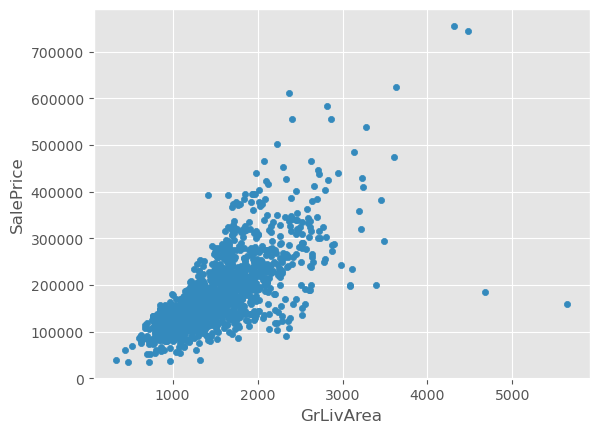

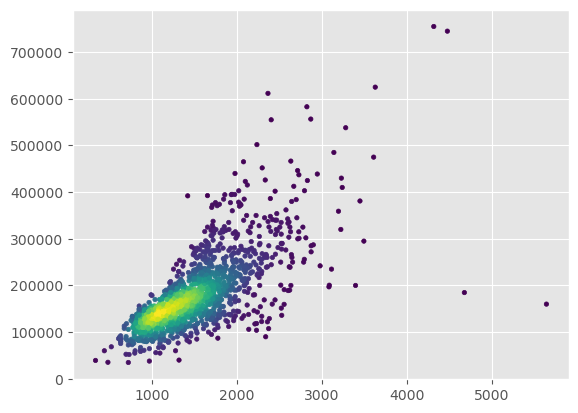

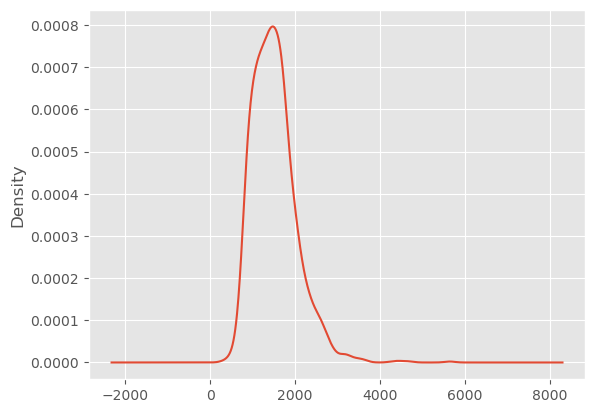

In [24]:
data_show_numerical('GrLivArea')

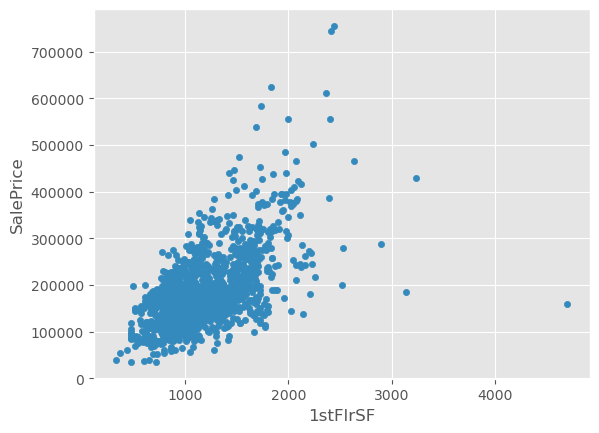

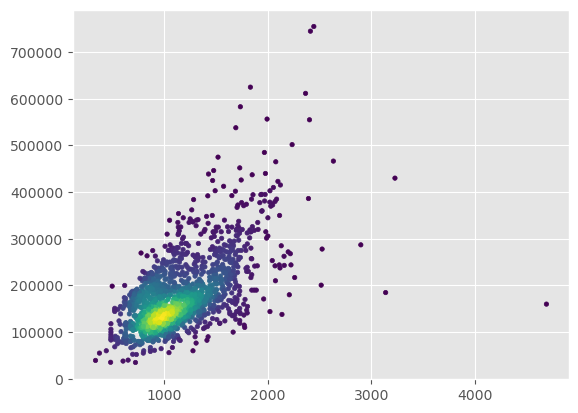

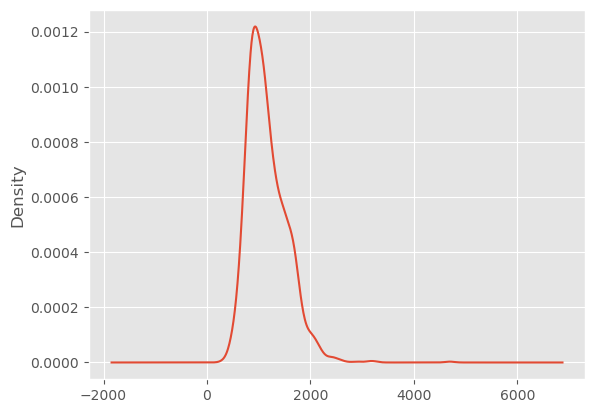

In [25]:
data_show_numerical('1stFlrSF')

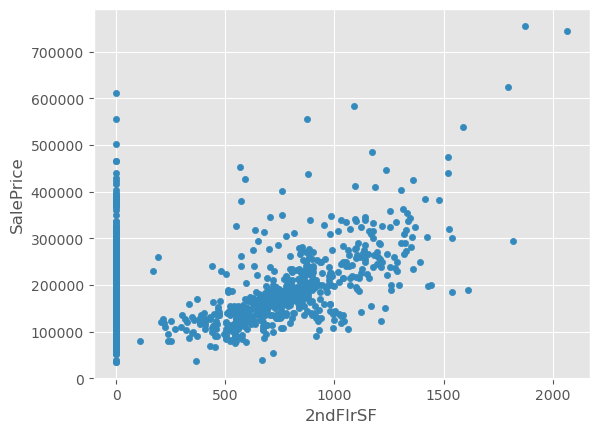

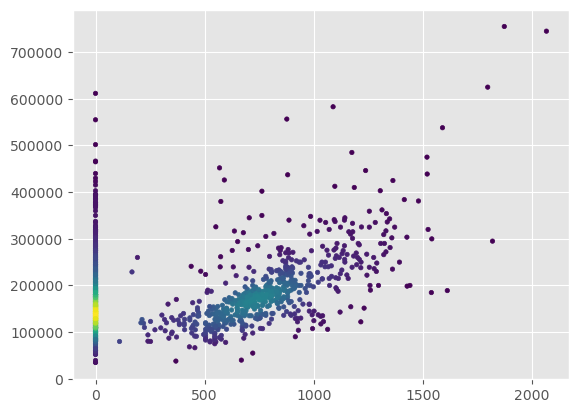

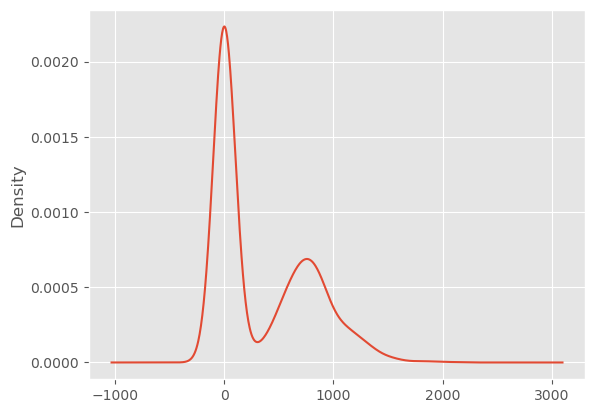

In [26]:
data_show_numerical('2ndFlrSF')

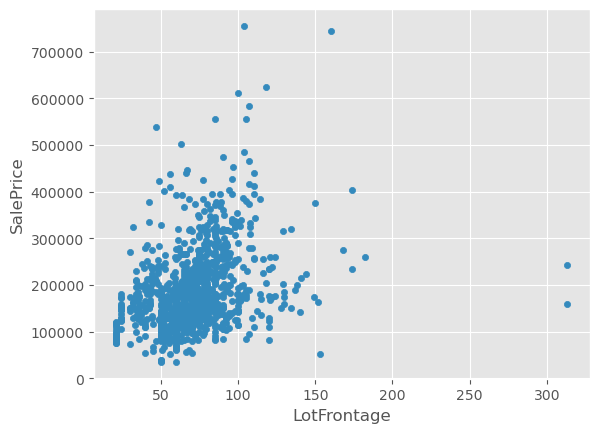

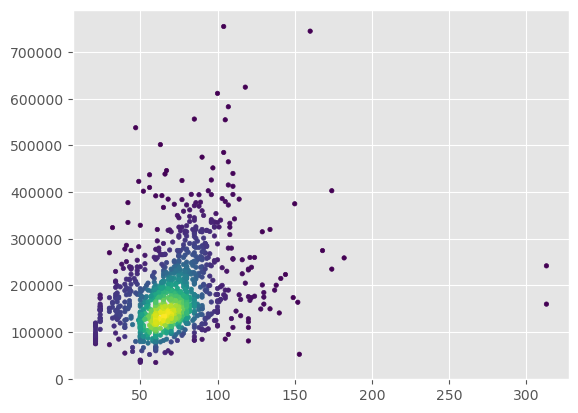

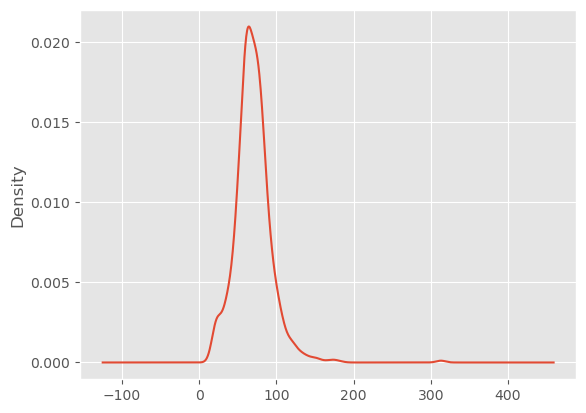

In [27]:
data_show_numerical('LotFrontage')

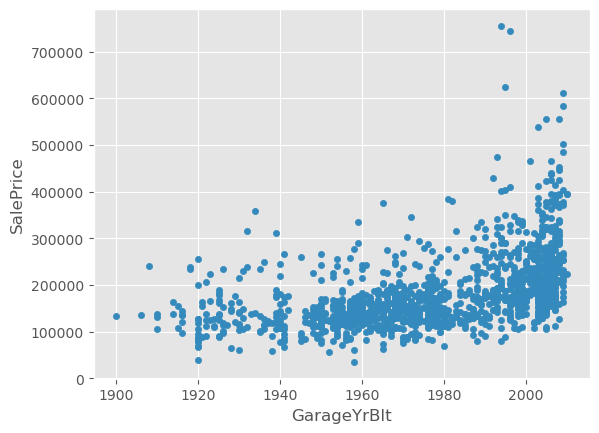

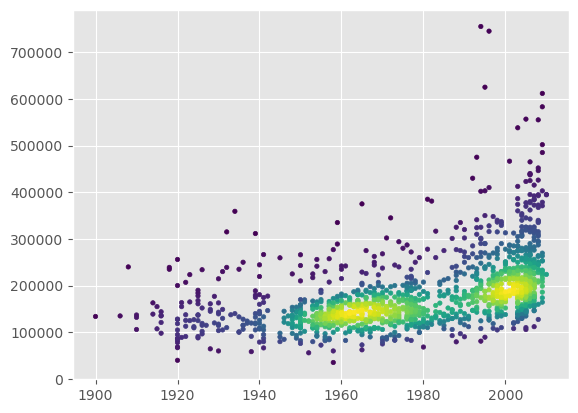

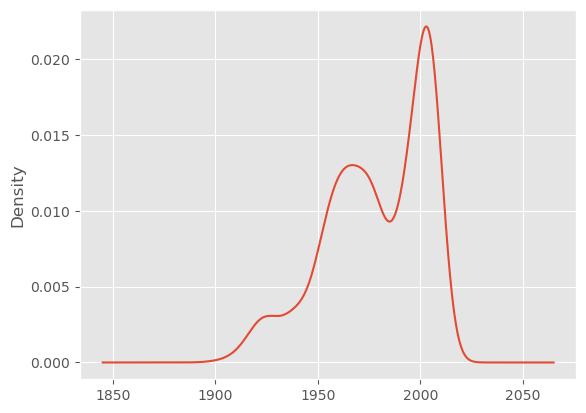

In [30]:
data_show_numerical('GarageYrBlt')

Correlations remarques et déductions


1) la présence de fireplace fais rentrer une proportion non négligeable de maisons dans le high price

2) plus le garage a été construit récemment, plus le prix est succeptible d'augmenter (high entre 1990 et 2000 typiquement)

3) le type de garage builtin indique que la maison est quasi certainement dans la catégorie high ou medium price

4) le 1ndFlrSF fait augmenter le sellprice de maniere exponentielle